# Chris Silos
# SYS 611 Homework 3
# 3.1 Simulating pi Again
## 3.1a

In [62]:
# Import libraries

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt



In [63]:
# Elementary variables
def drop_rice():
    # x and y represent the coordinates of the grain of rice within the white square
    x = np.random.rand()
    y = np.random.rand()

    # Calculate derived variable 'z'
    if np.sqrt( x**2 + y**2 ) <= 1:
        z = 4
    else:
        z = 0

    return(z)


## 3.1b

In [64]:
# Set the random number generator seed to 0
num_samples = 1000

# Generate 1000 samples
samples = [drop_rice() for i in range(num_samples)]

# Compute the lower and upper-bounds using a 95% confidence interval 
confidence_level = 0.05
z_crit = stats.norm.ppf(1-confidence_level/2)

# Print 95% confidence interval
print(f'95% confidence interval = {np.average(samples):.3f} +/- {z_crit*stats.sem(samples):.3f}')

95% confidence interval = 3.208 +/- 0.099


## 3.1c

In [65]:
def drop_rice_antithetic():
    # x and y represent the coordinates of the grain of rice within the white square
    x = np.random.rand()
    y = np.random.rand()

    
    # Calculate derived variable 'z1'
    if np.sqrt( x**2 + y**2 ) <= 1:
        z1 = 4
    else:
        z1 = 0

    # Calculate derived variable 'z2'
    if np.sqrt( (1-x)**2 + (1-y)**2 ) <= 1:
        z2 = 4
    else:
        z2 = 0

    # Calculate derived variable 'z_a'
    z_a = (z1+z2)/2

    return(z_a)

In [66]:
# Specify number of samples
num_samples = 1000

# Generate 1000 samples
samples = [drop_rice_antithetic() for i in range(num_samples)]

# Compute the lower and upper-bounds using a 95% confidence interval 
confidence_level = 0.05
z_crit = stats.norm.ppf(1-confidence_level/2)

# Print 95% confidence interval
print(f'95% confidence interval = {np.average(samples):.3f} +/- {z_crit*stats.sem(samples):.3f}')

95% confidence interval = 3.090 +/- 0.062


# 3.2 Aircraft Range Estimation
## 3.2a

In [67]:
# Define process generator for the lift to drag ratio
def gen_lift_drag():

    # Generate random number between 15 and 18 (uniform distribution)
    lift_drag_ratio = (np.random.rand()*3) + 15
    return(lift_drag_ratio)

In [68]:
def gen_init_to_final_weight(): 
    # Elementary variables represent the upper and lower bounds (a,b) of the ramp up funtion
    a = 1.3
    b = 1.5

    # Generate a value from a triangular distribution between the elementary variables
    f_x = np.random.triangular(left = a, mode = b, right = b)
    return(f_x)

## 3.2b

In [69]:
def calculate_range():

    # Define elementary variables
    velocity = 255
    lift_drag_ratio = gen_lift_drag()
    impulse = 5950
    init_to_final_weight_ratio = gen_init_to_final_weight()

    # Calculate the range (in meters) the aircraft can travel
    range_meters = velocity * lift_drag_ratio * impulse * np.log(init_to_final_weight_ratio)

    # Convert the range to kilometers
    range_kilometers = range_meters/1000

    return(range_kilometers)


## 3.2c

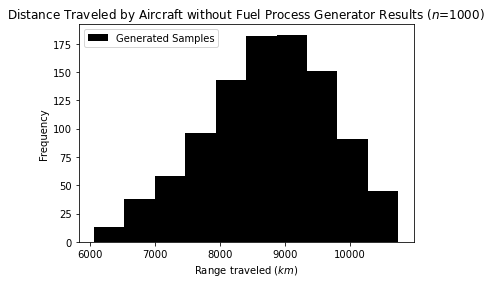

Sample Mean: 8971.857 km
25th percentile value: 8331.428699284099
Probability of exceeding 9000 km in range: 51.40%


In [70]:
# Specify number of samples
num_samples = 1000

# Generate 1000 samples
samples = [calculate_range() for i in range(num_samples)]

# Compute the lower and upper-bounds using a 25% confidence interval 
confidence_level = 0.75
z_crit = stats.norm.ppf(1-confidence_level/2)

# Plot histogram of samples (in KILOMETERS)
plt.figure()
plt.hist(samples, bins=10, align='left', color='black', label='Generated Samples')
plt.ylabel('Frequency')
plt.xlabel('Range traveled ($km$)')
plt.title(f'Distance Traveled by Aircraft without Fuel Process Generator Results ($n$={num_samples})')
plt.legend()
plt.show()

# Calculate and print sample mean
sample_mean = np.array(samples).mean()
print(f'Sample Mean: {sample_mean:.3f} km')

# Find 25th percentile sample
print(f'25th percentile value: {np.percentile(samples,25)}')

count = np.count_nonzero(np.array(samples) > 9000)
print(f'Probability of exceeding 9000 km in range: {count/num_samples*100:.2f}%')


# 3.3 Sven's Sweets
## 3.3a

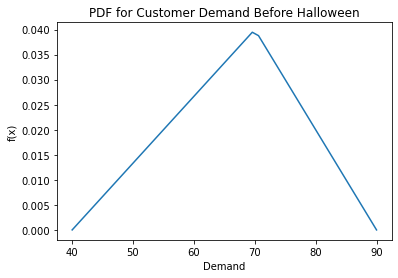

In [71]:
from scipy.stats import triang

x = np.linspace(40, 90)

plt.figure()
plt.title('PDF for Customer Demand Before Halloween')
plt.ylabel('f(x)')
plt.xlabel('Demand')
plt.plot(x, triang.pdf(x, 3/5, 40, 50), alpha=1, label='triang pdf')
plt.show()



## 3.3b
The decision variable is how much Sven orders
## 3.3c
The variable Sven seeks to maximize is profits. See attached document for the function
## 3.3d

In [76]:
# Function that generates a demand value according to the stated triangular distribution

def demand_generator():
    demand = np.random.triangular(left = 40, mode = 70, right = 90)
    return(demand)

## 3.3e

In [73]:
# Define a function that generates a profit for Sven's shop based on a given inventory level
def generate_profit(inv):

    # Generate a demand value from a triangle distribution (40, 70, 90)
    demand = demand_generator()
    
    # Set inventory equal to the argument inv
    inventory = inv

    if demand > inventory:
        # Calculate the profit if the demand is greater than the inventory
        profit = inventory*12 - inventory*10
    else:
        # Calculate the profit if the demand is not greater than the inventory
        profit = demand * 12 + (inventory-demand)*3 - (inventory*10)
    
    return(profit)


## 3.3f

In [77]:
# Print the mean profit over 1000 simulations for each inventory level

profits_40 = [generate_profit(40) for i in range(num_samples)]
print(f'Mean profit with an inventory level of 40: ${np.array(profits_40).mean():.2f}')

profits_50 = [generate_profit(50) for i in range(num_samples)]
print(f'Mean profit with an inventory level of 50: ${np.array(profits_50).mean():.2f}')

profits_60 = [generate_profit(60) for i in range(num_samples)]
print(f'Mean profit with an inventory level of 60: ${np.array(profits_60).mean():.2f}')

profits_70 = [generate_profit(70) for i in range(num_samples)]
print(f'Mean profit with an inventory level of 70: ${np.array(profits_70).mean():.2f}')

profits_80 = [generate_profit(80) for i in range(num_samples)]
print(f'Mean profit with an inventory level of 80: ${np.array(profits_80).mean():.2f}')

profits_90 = [generate_profit(90) for i in range(num_samples)]
print(f'Mean profit with an inventory level of 90: ${np.array(profits_90).mean():.2f}')

Mean profit with an inventory level of 40: $80.00
Mean profit with an inventory level of 50: $97.76
Mean profit with an inventory level of 60: $104.21
Mean profit with an inventory level of 70: $86.08
Mean profit with an inventory level of 80: $37.15
Mean profit with an inventory level of 90: $-21.78


<BarContainer object of 6 artists>

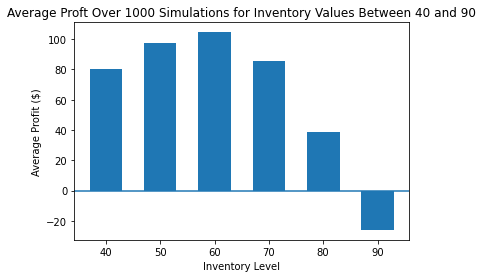

In [75]:
# Create list containing the average profit over 1000 simulations for each inventory level
average_profit_list = [np.array(profits_40).mean(), np.array(profits_50).mean(), np.array(profits_60).mean(), np.array(profits_70).mean(), np.array(profits_80).mean(), np.array(profits_90).mean()]

# Create list containing each possible inventory value
inventory_list = [40, 50, 60, 70, 80, 90]

# Plot bar chart for the average profit at each inventory level
plt.figure()
plt.title('Average Proft Over 1000 Simulations for Inventory Values Between 40 and 90')
plt.ylabel('Average Profit ($)')
plt.xlabel('Inventory Level')
plt.axhline(y=0)
plt.bar(inventory_list, average_profit_list, width = 6)
